<center><p float="center">
  <img src="titulo.png" width="900" height="50"/>
</p></center>

<h1><center><font size=7>Caso de estudio: Fuga de clientes</center></h1>

<center><img src="fuga.jpg" width="800" height="400"></center>

El siguiente es un ejemplo de la solución de un caso para atender el tema de fuga de clientes en el sector bancario. Este tipo de tareas se atiende con algoritmos de aprendizaje supervisado específicamente es una tarea de clasificación. Dentro del archivo se encuentran diferentes pasos que se realizan a fin de presentar un modelo final entrenado que permita identificar clientes que van a dejar el Banco. El propósito de estas iniciativas es que las organizaciones se anticipen y logren retener a los clientes y no esperar a que estos se alejen o se marchen a la competencia para reaccionar. 

El dataset se compone de 13 columnas: 

**1. Cliente ID:**  Identificador del cliente.

**2. Apellido:** Apellido del cliente.

**3. ScoreCrediticio:** Es un número que expresa la capacidad para pagar deudas. Entre mayor es el score crediticio mejores oportunidades de crédito puede optar el cliente.

**4. País:** El banco tiene sede en tres países europeos.

**5. Género:** Indica si el cliente es hombre o mujer.

**6. Edad:**  Años de vida del cliente.

**7. AñosCliente:** Corresponde a la antigüedad del cliente, entre más años más antigüedad tiene el cliente.

**8. Saldo:** Saldo en la cuenta bancaria del cliente.

**9. CantidadProductos:** Cantidad de productos activos del cliente con el banco.

**10. TarjetaCredito:** Indica si el cliente tiene o no una tarjeta de crédito con el banco.

**11. ClienteActivo:** Indica si el cliente se mantiene activo en los canales digitales del banco (Aplicación móvil y sitio web).

**12. Salario:** Salario anual reportado por el cliente. 

**13. Deserción:** Variable objetivo. 1 indica que el cliente se fuga del banco. 0 es un cliente que aún permanece en el banco.  


# Contenidos

1. **[Paquetes Utilizados](#instalar)**
2. **[Carga de datos](#carga)**
3. **[Análisis exploratorio de datos](#EDA)**
4. **[Implementación del primer modelo](#primer_modelo)**
5. **[Implementación de un segundo modelo mejorado](#segundo_modelo)**
6. **[Optimización de parámetros](#optimizacion)**

<a id="instalar"> </a>
# Paquetes previos que se deben instalar

In [1]:
#!pip install imblearn ### balanceo de clases
#!pip install xgboost ### árbol de decisión
#!pip install pydotplus ### Gráficos de decision tree

# Paquetes

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm


### Sklearn para modelos de machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.metrics import roc_auc_score,confusion_matrix,f1_score,accuracy_score,precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

### Para importar xgboost
from xgboost import XGBClassifier

### Imblearn para balanceo de clases
from imblearn.over_sampling import SMOTE

from pydotplus import graph_from_dot_data

# Comando para decirle a Python muestre los gráficos evitar el .show()
%matplotlib inline

# para restringir el valor flotante a 3 decimales
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<a id="carga"> </a>
# Carga de Datos

In [13]:
## carga de datos
url = "ModeloDesercion.csv"
df = pd.read_csv(url,sep=";")

<a id="EDA"> </a>
# EDA

Exploración y tratamiento de los datos

## Exploración Estadística de los Datos

In [14]:
df.head()

,IdentificadorFila,ClienteID,Apellido,ScoreCrediticio,País,Genero,Edad,AñosCliente,Saldo,CantidadProductos,TarjetaCredito,ClienteActivo,Salario,Desercion
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IdentificadorFila  10000 non-null  int64  
 1   ClienteID          10000 non-null  int64  
 2   Apellido           10000 non-null  object 
 3   ScoreCrediticio    10000 non-null  int64  
 4   País               10000 non-null  object 
 5   Genero             10000 non-null  object 
 6   Edad               10000 non-null  int64  
 7   AñosCliente        10000 non-null  int64  
 8   Saldo              10000 non-null  float64
 9   CantidadProductos  10000 non-null  int64  
 10  TarjetaCredito     10000 non-null  int64  
 11  ClienteActivo      10000 non-null  int64  
 12  Salario            10000 non-null  float64
 13  Desercion          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

IdentificadorFila    0
ClienteID            0
Apellido             0
ScoreCrediticio      0
País                 0
Genero               0
Edad                 0
AñosCliente          0
Saldo                0
CantidadProductos    0
TarjetaCredito       0
ClienteActivo        0
Salario              0
Desercion            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IdentificadorFila,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
ClienteID,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
ScoreCrediticio,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Edad,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
AñosCliente,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Saldo,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
CantidadProductos,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
TarjetaCredito,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
ClienteActivo,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
Salario,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [9]:
def coeVariacion(datos):
    media = np.mean(datos)
    desEstandar = np.std(datos, ddof=1)
    cv = (desEstandar / media) * 100
    return cv


cv_Edad_Cliente = coeVariacion(df['Edad'])
cv_Años_Cliente = coeVariacion(df['AñosCliente'])
cv_Saldo_Cliente = coeVariacion(df['Saldo'])
cv_Salario_Cliente = coeVariacion(df['Salario'])
cv_Score_Crediticio = coeVariacion(df['ScoreCrediticio'])

### Revisar Saldo y Salario Cliente 

In [10]:
print("Coef. Variación Edad Cliente: " + str(cv_Edad_Cliente))
print("Coef. Variación Años de ser cliente del banco: " + str(cv_Años_Cliente))
print("Coef. Variación Saldo Cliente: " +str(cv_Saldo_Cliente))
print("Coef. Variación Salario Cliente: " +str(cv_Salario_Cliente))
print("Coef. Variación Score Crediticio: " +str(cv_Score_Crediticio))

Coef. Variación Edad Cliente: 26.945841280990578
Coef. Variación Años de ser cliente del banco: 57.69578632799449
Coef. Variación Saldo Cliente: 81.5802833479977
Coef. Variación Salario Cliente: 57.4586422073461
Coef. Variación Score Crediticio: 14.857650996563196


In [11]:
### Detección de outliers

def determinarOutliers(columna):
    
    q1=columna.quantile(0.25)
    
    q3=columna.quantile(0.75)
    
    IQR=q3-q1
    
    outliers = columna[((columna<(q1-1.5*IQR)) | (columna>(q3+1.5*IQR)))]

    return outliers

outlier_Edad_Cliente = determinarOutliers(df['Edad'])
outlier_Años_Cliente = determinarOutliers(df['AñosCliente'])
outlier_Saldo_Cliente = determinarOutliers(df['Saldo'])
outlier_Salario_Cliente = determinarOutliers(df['Salario'])


print("Outlier Edad Cliente: ")
print(outlier_Edad_Cliente)

print("outlier_Años_Cliente: ")
print(outlier_Años_Cliente)

print("outlier_Saldo_Cliente: ")
print(outlier_Saldo_Cliente)

print("outlier_Salario_Cliente: ")
print(outlier_Años_Cliente)


Outlier Edad Cliente: 
58      66
85      75
104     65
158     73
181     65
        ..
9753    68
9765    64
9832    64
9894    77
9936    77
Name: Edad, Length: 359, dtype: int64
outlier_Años_Cliente: 
Series([], Name: AñosCliente, dtype: int64)
outlier_Saldo_Cliente: 
Series([], Name: Saldo, dtype: float64)
outlier_Salario_Cliente: 
Series([], Name: AñosCliente, dtype: int64)


## Visualización de Datos

### Análisis de la variable target Deserción

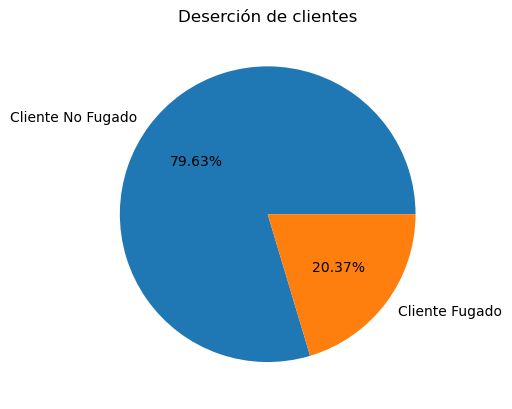

In [12]:
plt.title('Deserción de clientes')
plt.pie(df['Desercion'].value_counts(),labels = ['Cliente No Fugado', 'Cliente Fugado'],autopct='%.2f%%')
plt.show() 

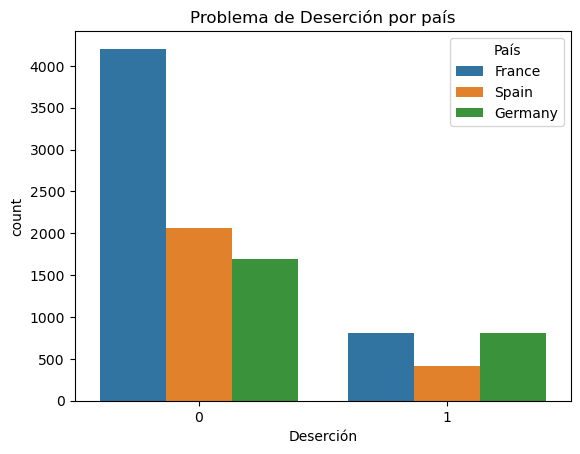

In [16]:
plt.title('Problema de Deserción por país')
sns.countplot(data=df, x='Desercion',hue='País')
plt.xlabel('Deserción');

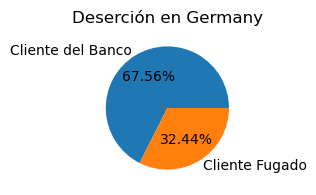

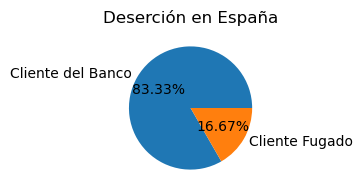

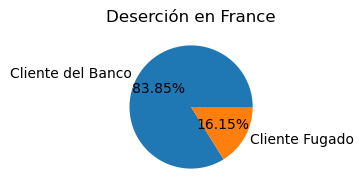

In [17]:
Germany = df[df['País'] == 'Germany']
Spain = df[df['País'] == 'Spain']
France = df[df['País'] == 'France']

plt.figure(figsize=(7,2))
plt.title('Deserción en Germany')
plt.pie(Germany['Desercion'].value_counts(),labels = ['Cliente del Banco', 'Cliente Fugado'],autopct='%.2f%%')
plt.show() 

plt.figure(figsize=(7,2))
plt.title('Deserción en España')
plt.pie(Spain['Desercion'].value_counts(),labels = ['Cliente del Banco', 'Cliente Fugado'],autopct='%.2f%%')
plt.show() 

plt.figure(figsize=(7,2))
plt.title('Deserción en France')
plt.pie(France['Desercion'].value_counts(),labels = ['Cliente del Banco', 'Cliente Fugado'],autopct='%.2f%%')
plt.show() 


### Análisis de la variable Edad

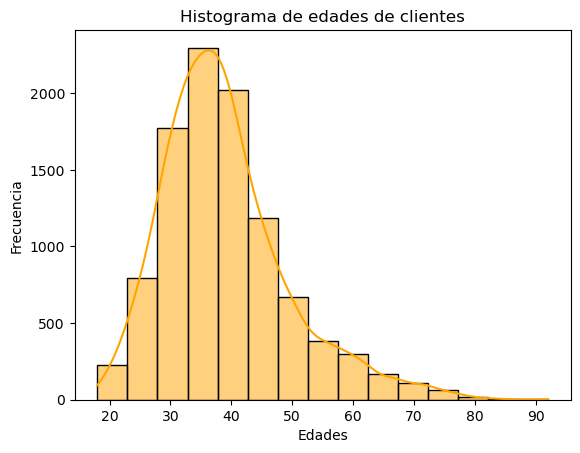

In [18]:
plt.title('Histograma de edades de clientes')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
sns.histplot(data=df, x='Edad',color='orange',bins=15,kde=True);

- **Kernel Density Estimation**, o **KDE**, visualiza la distribución de datos en un intervalo continuo.
- La escala convencional para KDE es: **Frecuencia total de cada contenedor × Probabilidad**

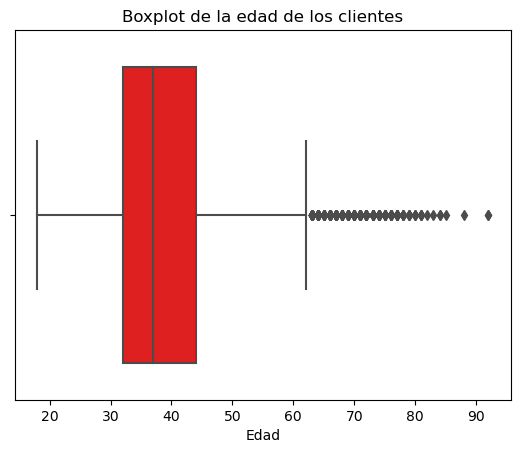

In [19]:
plt.title('Boxplot de la edad de los clientes')
sns.boxplot(data=df, x='Edad',color='red');

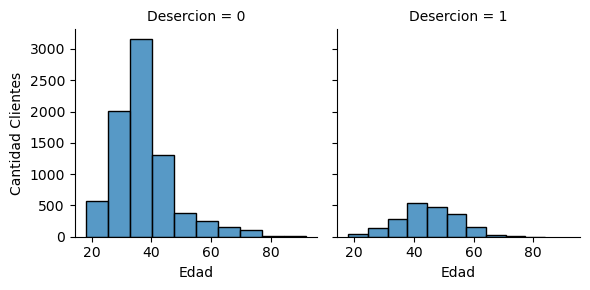

In [20]:
g = sns.FacetGrid(df, col="Desercion")
g.map(sns.histplot, 'Edad', bins=10);
g.set_axis_labels("Edad","Cantidad Clientes");

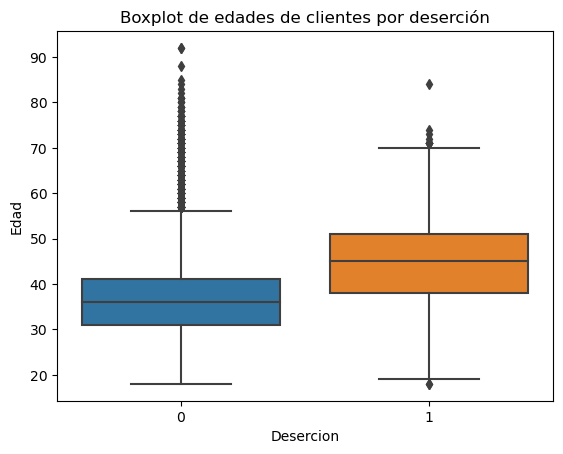

In [21]:
plt.title('Boxplot de edades de clientes por deserción')
plt.xlabel('Deserción')
plt.ylabel('Edad')
sns.boxplot(data=df, x='Desercion', y='Edad') ;

### Análisis de la variable saldo en la cuenta

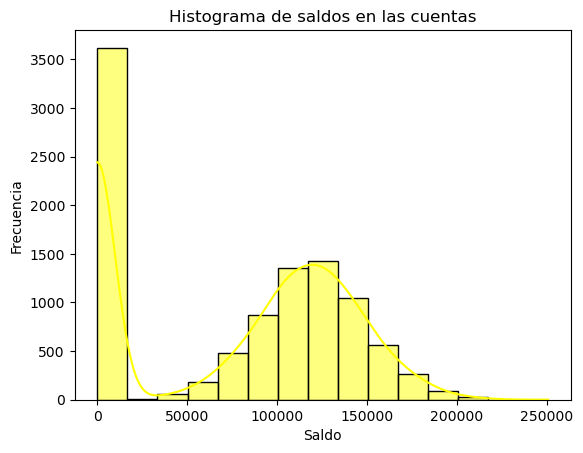

In [22]:
plt.title('Histograma de saldos en las cuentas')
plt.xlabel('Saldo')
plt.ylabel('Frecuencia')
sns.histplot(data=df, x='Saldo',color='yellow',bins=15,kde=True);

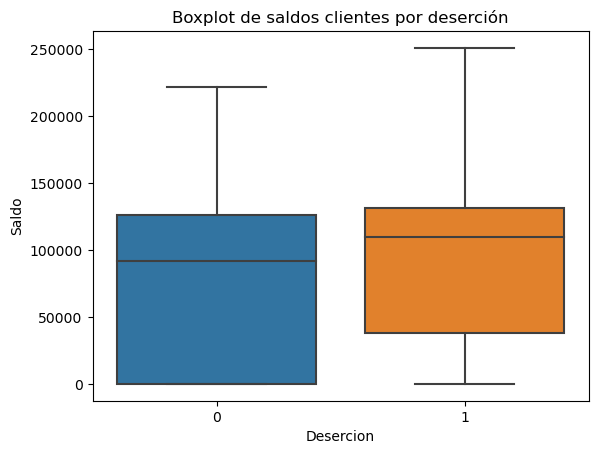

In [23]:
plt.title('Boxplot de saldos clientes por deserción')
plt.xlabel('Deserción')
plt.ylabel('Saldo')
sns.boxplot(data=df, x='Desercion', y='Saldo') ;

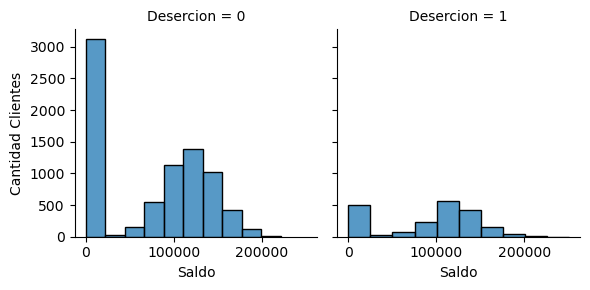

In [24]:
g = sns.FacetGrid(df, col="Desercion")
g.map(sns.histplot, 'Saldo', bins=10);
g.set_axis_labels("Saldo","Cantidad Clientes");

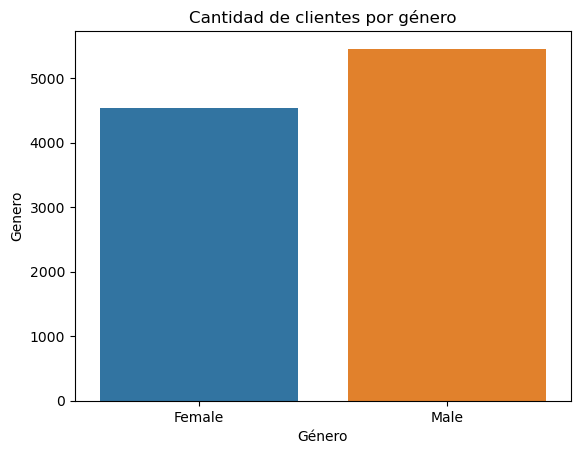

In [25]:
plt.xlabel("Género")
plt.ylabel("Total")
plt.title("Cantidad de clientes por género")

x = df['Genero'].unique()
y = df['Genero'].value_counts().sort_values()

sns.barplot(data=df,y=y,x=x);

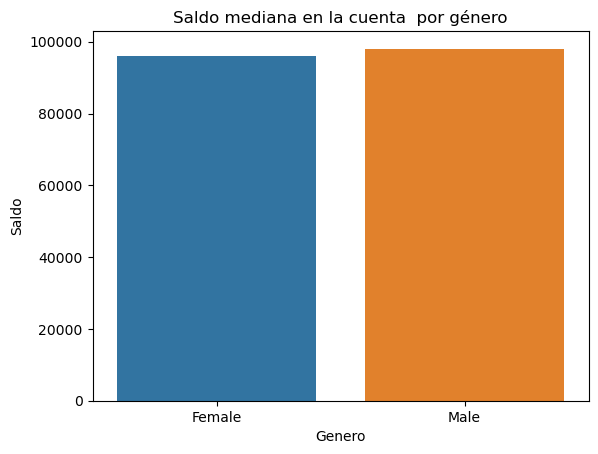

In [26]:
saldoPromedio = df.groupby(['Genero'])['Saldo'].median()

y = saldoPromedio[['Female','Male']]
x = saldoPromedio.index

plt.xlabel("Género")
plt.ylabel("Saldo Promedio")
plt.title("Saldo mediana en la cuenta  por género")

sns.barplot(data=df,y=y,x=x);

### Análisis de la variable salario

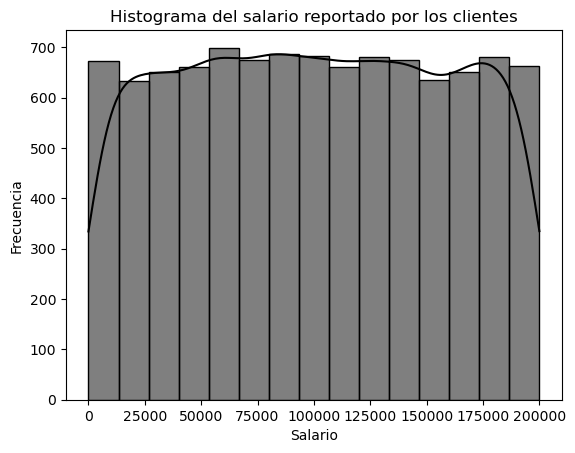

In [27]:
plt.title('Histograma del salario reportado por los clientes')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
sns.histplot(data=df, x='Salario',color='black',bins=15,kde=True);

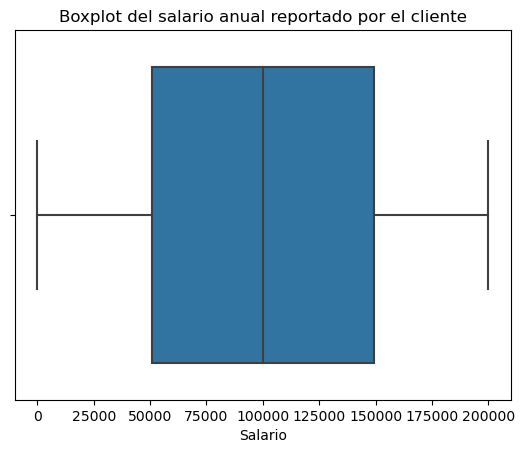

In [28]:
plt.title('Boxplot del salario anual reportado por el cliente')
plt.xlabel('Salario')
sns.boxplot(data=df, x='Salario') ;

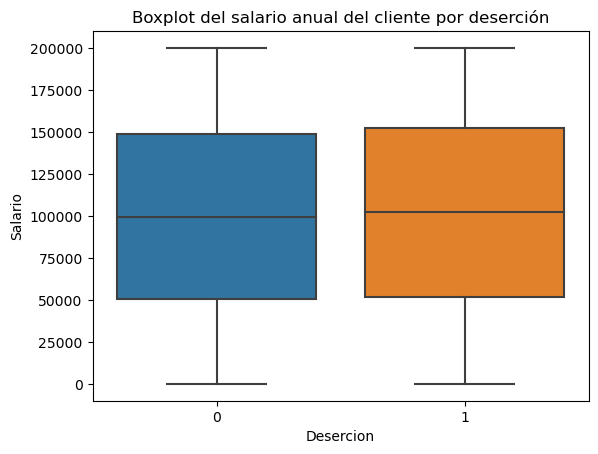

In [29]:
plt.title('Boxplot del salario anual del cliente por deserción')
plt.xlabel('Deserción')
plt.ylabel('Salario')
sns.boxplot(data=df, x='Desercion', y='Salario') ;

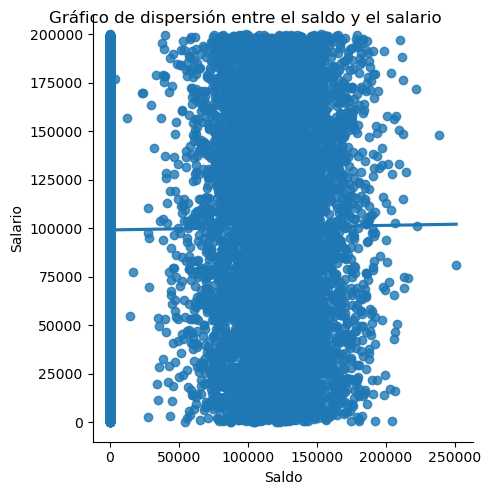

In [30]:
sns.lmplot(data=df, x='Saldo', y='Salario',ci=False).fig.suptitle("Gráfico de dispersión entre el saldo y el salario");

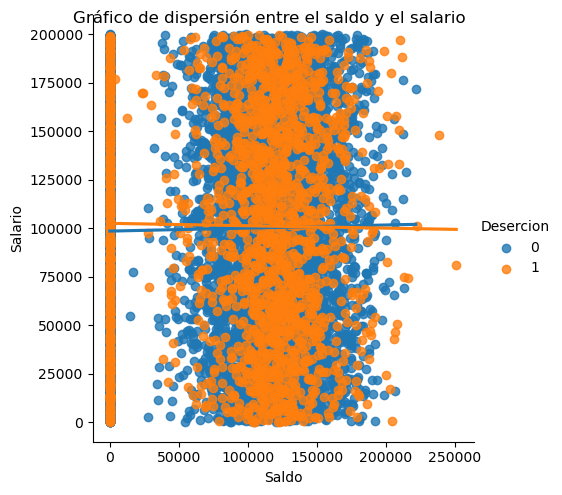

In [31]:
sns.lmplot(data=df, x='Saldo', y='Salario',hue='Desercion',ci=False).fig.suptitle("Gráfico de dispersión entre el saldo y el salario");

### Análisis de la variable cliente activo en canales digitales

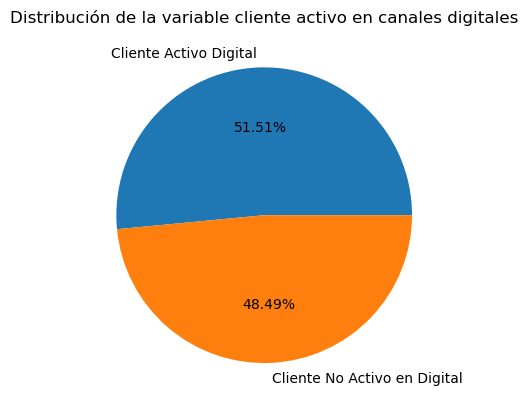

In [32]:
plt.title('Distribución de la variable cliente activo en canales digitales')
plt.pie(df['ClienteActivo'].value_counts(),labels = ['Cliente Activo Digital', 'Cliente No Activo en Digital'],autopct='%.2f%%')
plt.show() 

### Análisis de la variable Score Crédito

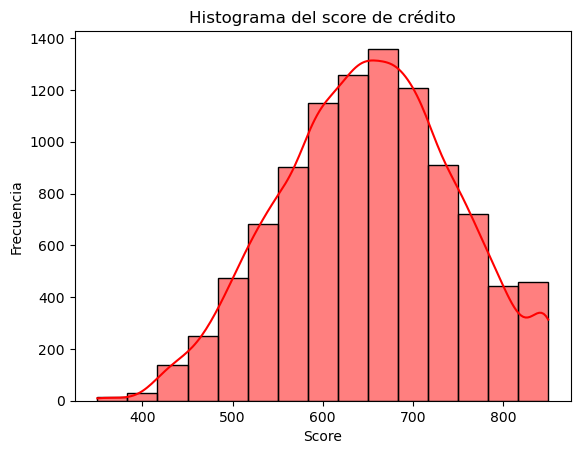

In [33]:
plt.title('Histograma del score de crédito')
plt.xlabel('Score')
plt.ylabel('Frecuencia')
sns.histplot(data=df, x='ScoreCrediticio',color='red',bins=15,kde=True);

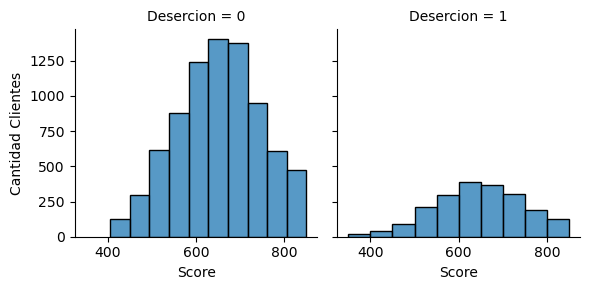

In [34]:
g = sns.FacetGrid(df, col="Desercion")
g.map(sns.histplot, 'ScoreCrediticio', bins=10);
g.set_axis_labels("Score","Cantidad Clientes");

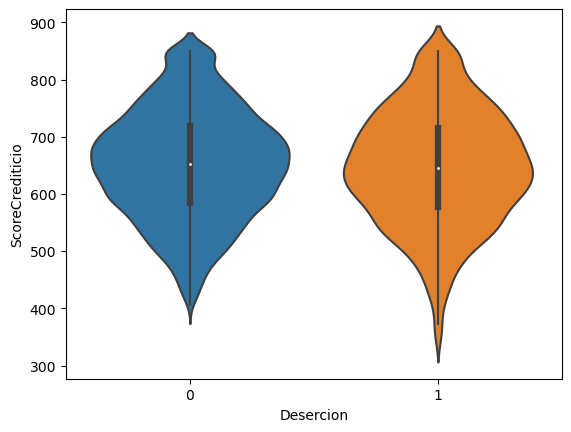

In [35]:
sns.violinplot(data=df, x='Desercion', y='ScoreCrediticio', orient='v');

### Análisis  de la variable años del cliente

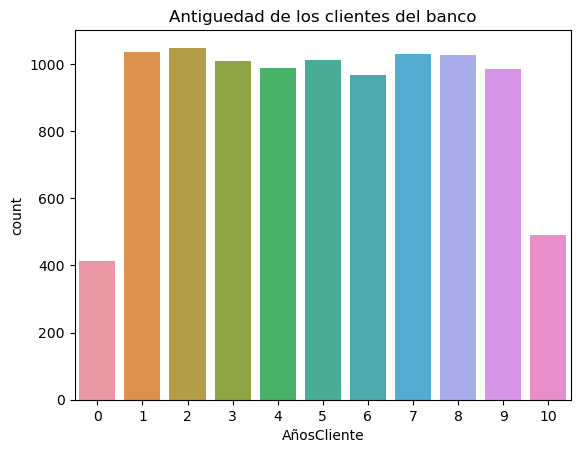

In [36]:
plt.title('Antiguedad de los clientes del banco')
sns.countplot(data=df, x='AñosCliente');

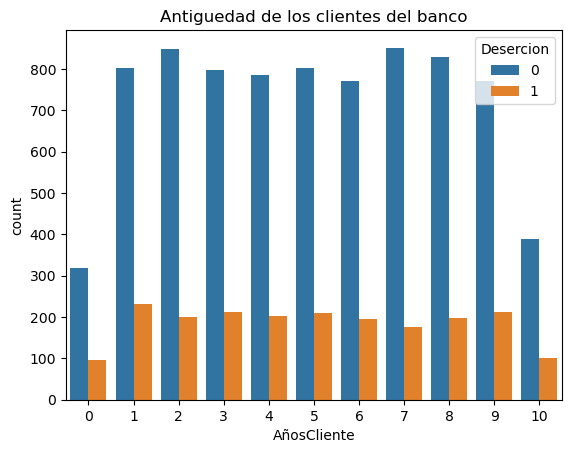

In [37]:
plt.title('Antiguedad de los clientes del banco')
sns.countplot(data=df, x='AñosCliente', hue='Desercion');

### Análisis de la variable cantidad de productos

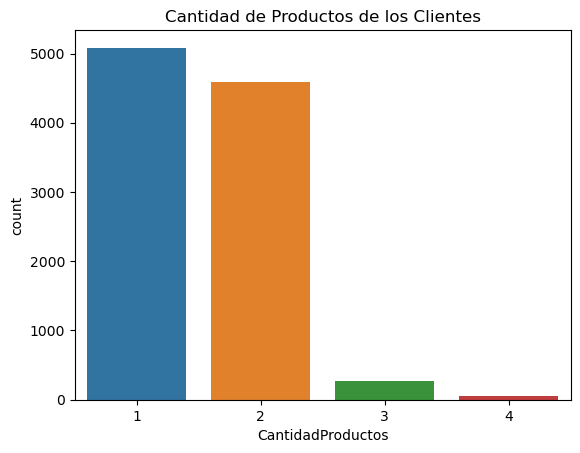

In [38]:
plt.title('Cantidad de Productos de los Clientes')
sns.countplot(data=df, x='CantidadProductos');

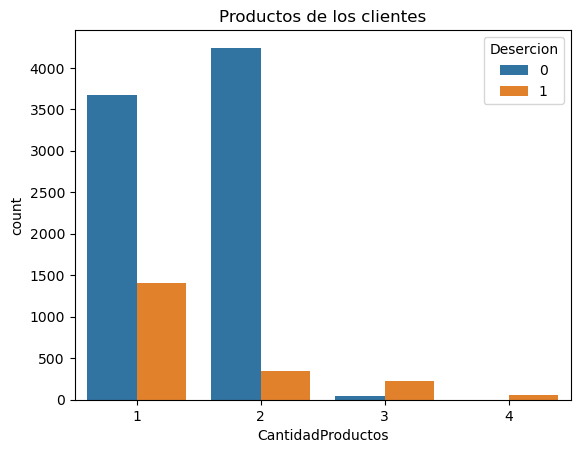

In [39]:
plt.title('Productos de los clientes')
sns.countplot(data=df, x='CantidadProductos', hue='Desercion');

### Análisis de la variable Tarjeta Crédito

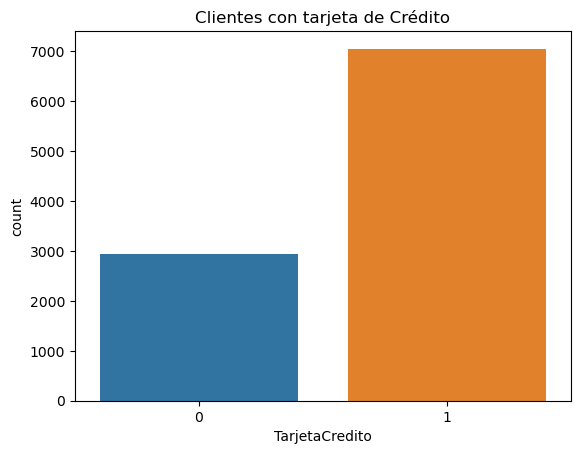

In [40]:
plt.title('Clientes con tarjeta de Crédito')
sns.countplot(data=df, x='TarjetaCredito');

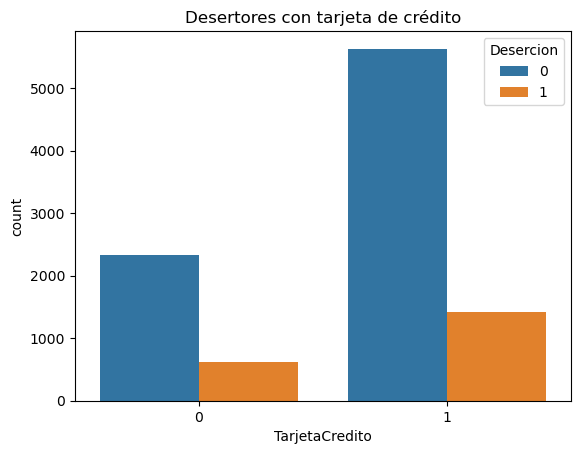

In [41]:
plt.title('Desertores con tarjeta de crédito')
sns.countplot(data=df, x='TarjetaCredito', hue='Desercion');

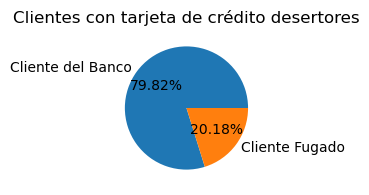

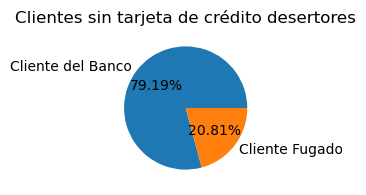

In [42]:
tarjetaCredito = df[df['TarjetaCredito'] == 1]
sinTarjetaCredito = df[df['TarjetaCredito'] == 0]

plt.figure(figsize=(7,2))
plt.title('Clientes con tarjeta de crédito desertores')
plt.pie(tarjetaCredito['Desercion'].value_counts(),labels = ['Cliente del Banco', 'Cliente Fugado'],autopct='%.2f%%')
plt.show() 

plt.figure(figsize=(7,2))
plt.title('Clientes sin tarjeta de crédito desertores')
plt.pie(sinTarjetaCredito['Desercion'].value_counts(),labels = ['Cliente del Banco', 'Cliente Fugado'],autopct='%.2f%%')
plt.show() 

### Análisis multiple de variables

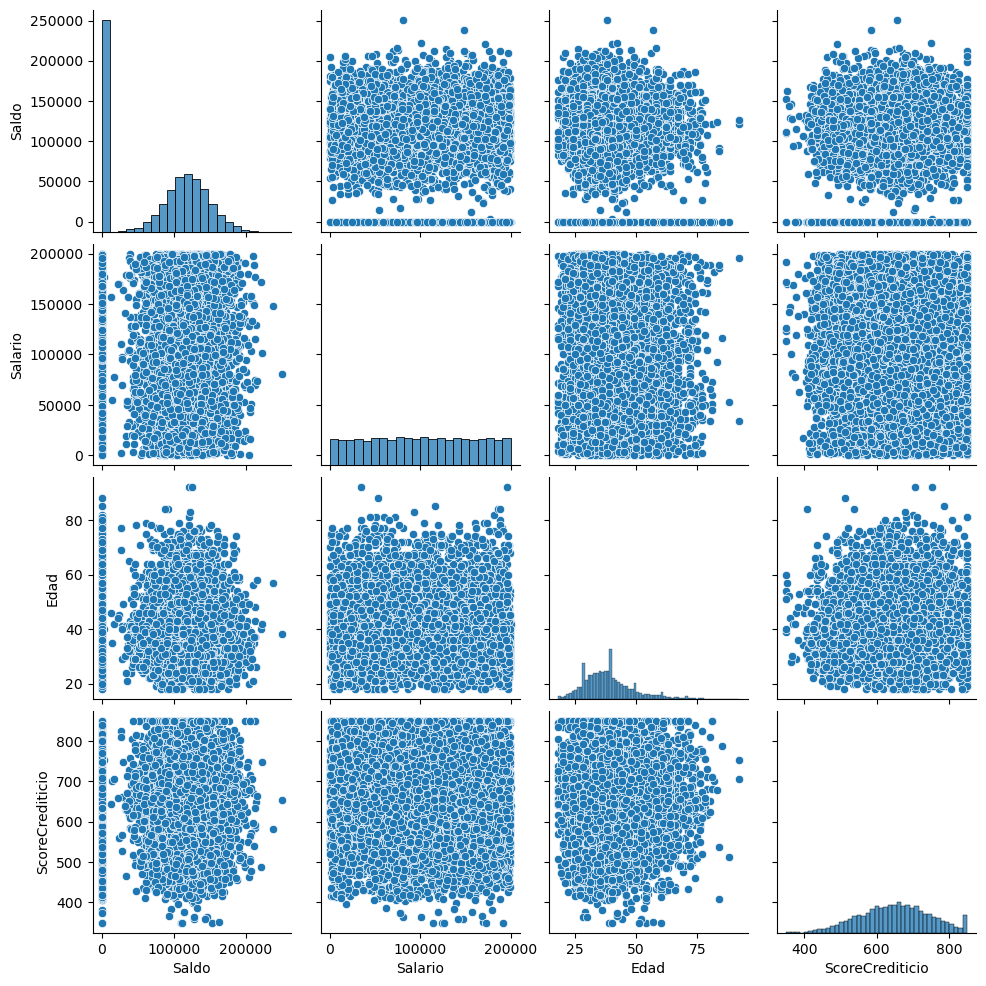

In [43]:
sns.pairplot(data=df[['Saldo','Salario','Edad','ScoreCrediticio']]);

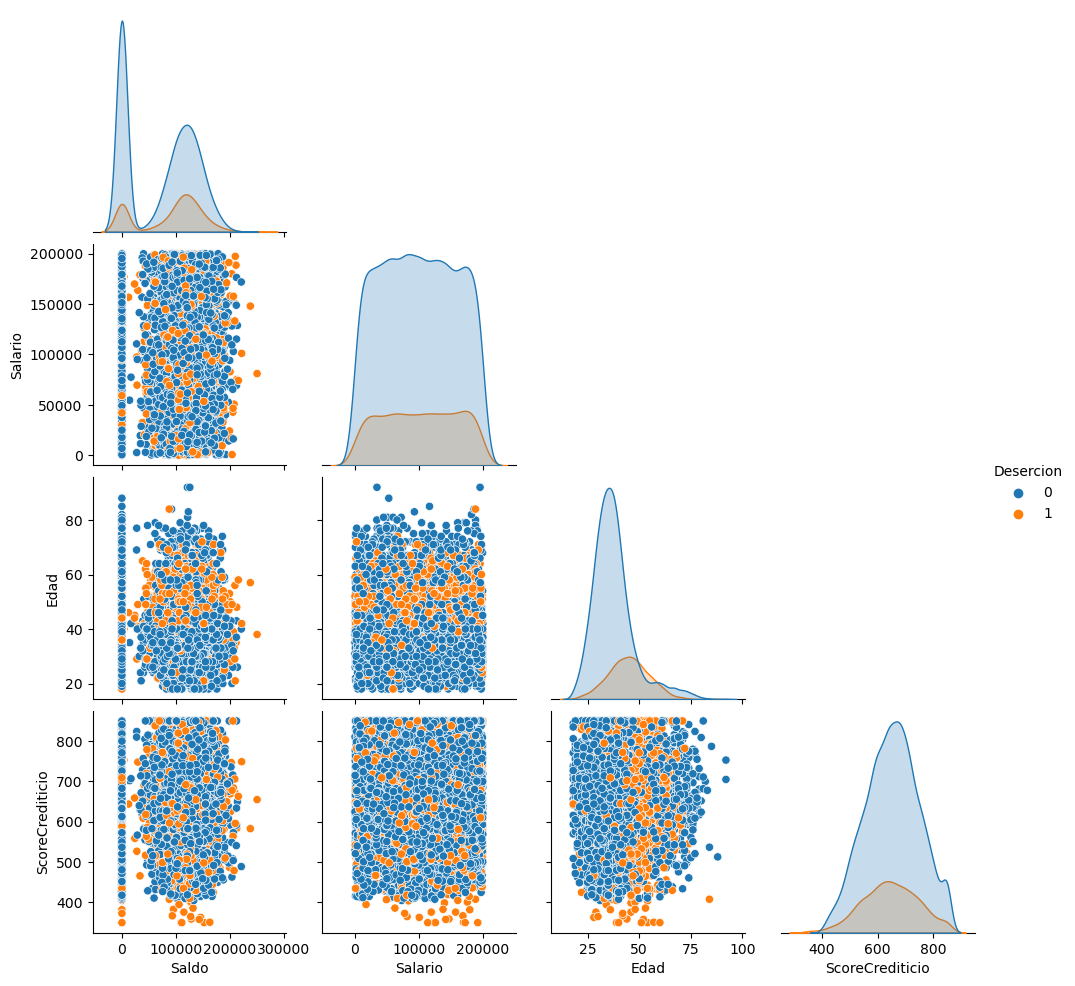

In [44]:
sns.pairplot(data=df, vars=['Saldo','Salario','Edad','ScoreCrediticio'], hue='Desercion', corner=True);

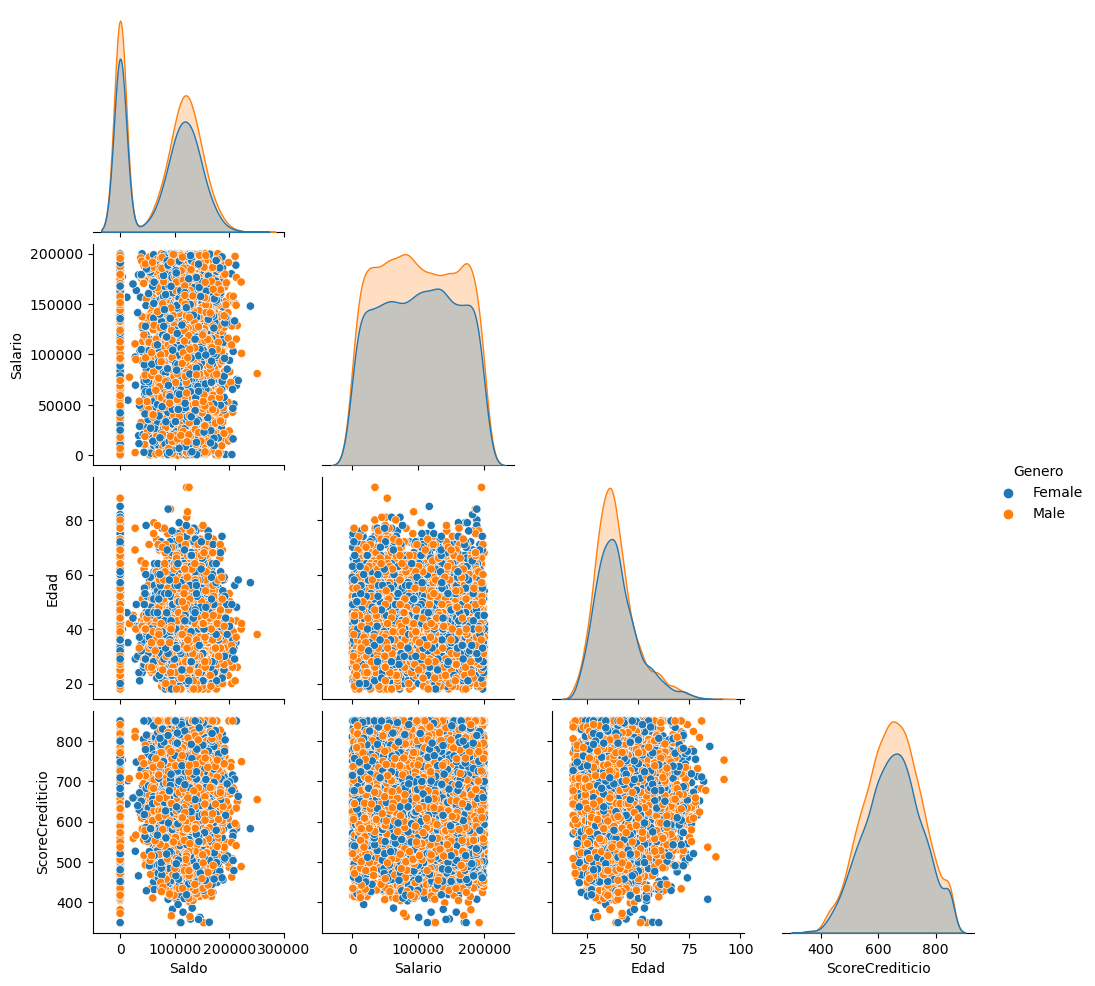

In [45]:
sns.pairplot(data=df, vars=['Saldo','Salario','Edad','ScoreCrediticio'], hue='Genero', corner=True);

### Matriz de Correlación

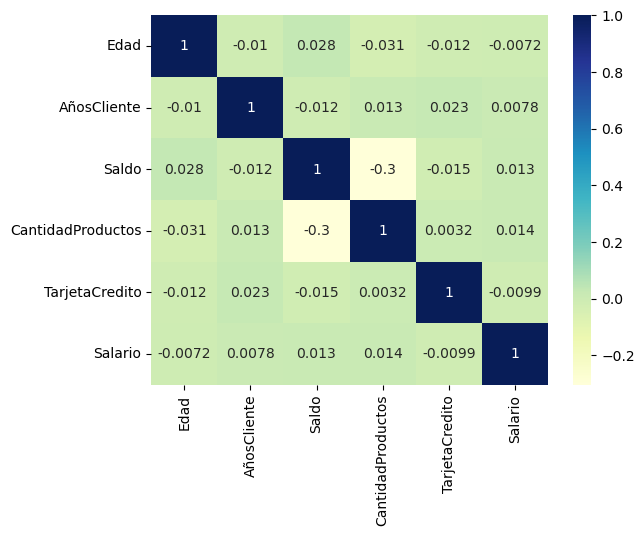

In [46]:
sns.heatmap(data=df[['Edad','AñosCliente','Saldo','CantidadProductos','TarjetaCredito','Salario']].corr(), annot=True,cmap='YlGnBu');

### Conclusiones del EDA

1. Los datos no presentan errores de calidad como valores nulos o duplicados.

2. La variable deserción se encuentra con un desbalance, es decir, hay muchas observaciones de clientes no desertores y solo el 20% de los datos son clientes fugados. Esto podría generar sesgos en el modelo y resultados de precisión o sensibilidad bajos para la variable target. 

3. El país con más problemas de deserción es Alemania, están perdiendo más del 30 % de los clientes.

4. En la variable edad se encuentran valores outliers pero esto es debido a la distribución de los datos, ya que el 50% de los clientes se ubican en un rango de edad de entre 30 a 45 años con una mediana de unos 38 años. Por tal razón, no se procede a eliminar outliers. 

5. No se observa en los gráficos que la edad sea un factor clave para la fuga de clientes. Sin embargo, si se observa que los clientes desertores tienen un rango de edad superior a clientes no desertores. 

6. Existen más de 3500 clientes con saldo 0 en la cuenta o cercano. Sin embargo, no se observa que clientes desertores tengan menos saldo en las cuentas que clientes que se mantienen en el banco.

7. Los datos de acuerdo con el género se encuentran balanceados, es decir, aunque hay mas clientes hombres, tampoco hay una gran diferencia.

8. Tanto hombres como mujeres presentan un promedio de saldos bastante similar.

9. El 50% de los clientes reportan salarios anuales entre 50 mil y 150 mil dólares. 

10. No existe diferencia significativa entre el salario reportado y la deserción.

11. No existe una correlación entre el salario y el saldo.

12. Los datos de la variable de clientes activos en canales digitales se encuentran balanceados, 51.51 % son activos en canales digitales y 48.49% de los clientes no son activos en canales digitales.

13. El score de crédito tampoco muestra una distribución diferente para clientes desertores y no desertores. 

14. La antigüedad de clientes se encuentra repartida de manera muy uniforme, donde hay menos clientes son con 0 y con 10 años de antigüedad. 

15. La mayoria de clientes tiene 1 y 2 productos. Hay pocas observaciones de clientes con 3 y 4 productos.

16. No se encuentra que la tarjeta de crédito sea un factor determinante para retener clientes, podría ser que los clientes no la estén utilizando.

17. No se observa una correlación fuerte positiva o negativa entre las variables.


<a id="primer_modelo"> </a>
# Primer Modelado del Problema
Más que buscar obtener buenos resultados en la predicción, el objetivo de este primer modelado es entender el problema de deserción de la empresa, la interpretación de acuerdo con el negocio y cuáles son las variables más relevantes para predecir. deserción. Por tal razón, en este primer modelado no se realizan tareas de transformación de datos.
Para lograr a este cometido se va a utilizar un decision tree y un random forest. 

#### Preparación de datos

In [28]:
df1 = df.copy() ### se realiza una copia del dataframe para trabajar sobre este.

In [29]:
df1.head()

,IdentificadorFila,ClienteID,Apellido,ScoreCrediticio,País,Genero,Edad,AñosCliente,Saldo,CantidadProductos,TarjetaCredito,ClienteActivo,Salario,Desercion
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [30]:
df1.columns

Index(['IdentificadorFila', 'ClienteID', 'Apellido', 'ScoreCrediticio', 'País',
       'Genero', 'Edad', 'AñosCliente', 'Saldo', 'CantidadProductos',
       'TarjetaCredito', 'ClienteActivo', 'Salario', 'Desercion'],
      dtype='object')

In [31]:
### Selección de variables. Se descarta el identificador de fila y del cliente.
df1 = df1[['ScoreCrediticio','País','Genero','Edad','AñosCliente','Saldo','CantidadProductos','TarjetaCredito','ClienteActivo','Salario','Desercion']]

In [32]:
df1

,ScoreCrediticio,País,Genero,Edad,AñosCliente,Saldo,CantidadProductos,TarjetaCredito,ClienteActivo,Salario,Desercion
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [34]:
### Convertir variables categóricas a numéricas
df1 = pd.get_dummies(df1, columns = ["Genero"],drop_first = True)  ### Cuando es 0 es mujer, 1 es hombre
df1 = pd.get_dummies(df1, columns = ["País"],drop_first = True)

In [35]:
df1.head(20)

,ScoreCrediticio,Edad,AñosCliente,Saldo,CantidadProductos,TarjetaCredito,ClienteActivo,Salario,Desercion,Genero_Male,País_Germany,País_Spain
0,619,42,2,0.000,1,1,1,101348.880,1,False,False,False
1,608,41,1,83807.860,1,0,1,112542.580,0,False,False,True
2,502,42,8,159660.800,3,1,0,113931.570,1,False,False,False
3,699,39,1,0.000,2,0,0,93826.630,0,False,False,False
4,850,43,2,125510.820,1,1,1,79084.100,0,False,False,True
5,645,44,8,113755.780,2,1,0,149756.710,1,True,False,True
6,822,50,7,0.000,2,1,1,10062.800,0,True,False,False
7,376,29,4,115046.740,4,1,0,119346.880,1,False,True,False
8,501,44,4,142051.070,2,0,1,74940.500,0,True,False,False
9,684,27,2,134603.880,1,1,1,71725.730,0,True,False,False


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ScoreCrediticio    10000 non-null  int64  
 1   Edad               10000 non-null  int64  
 2   AñosCliente        10000 non-null  int64  
 3   Saldo              10000 non-null  float64
 4   CantidadProductos  10000 non-null  int64  
 5   TarjetaCredito     10000 non-null  int64  
 6   ClienteActivo      10000 non-null  int64  
 7   Salario            10000 non-null  float64
 8   Desercion          10000 non-null  int64  
 9   Genero_Male        10000 non-null  bool   
 10  País_Germany       10000 non-null  bool   
 11  País_Spain         10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.6 KB


In [37]:
df1.head()

,ScoreCrediticio,Edad,AñosCliente,Saldo,CantidadProductos,TarjetaCredito,ClienteActivo,Salario,Desercion,Genero_Male,País_Germany,País_Spain
0,619,42,2,0.000,1,1,1,101348.880,1,False,False,False
1,608,41,1,83807.860,1,0,1,112542.580,0,False,False,True
2,502,42,8,159660.800,3,1,0,113931.570,1,False,False,False
3,699,39,1,0.000,2,0,0,93826.630,0,False,False,False
4,850,43,2,125510.820,1,1,1,79084.100,0,False,False,True


In [38]:
### Renombrar variables 
df1.columns = ['ScoreCrediticio','Edad','AñosCliente','Saldo','CantidadProductos','TarjetaCredito','ClienteActivo','Salario','Desercion','Genero','Alemania','España']

In [39]:
df1.head()

,ScoreCrediticio,Edad,AñosCliente,Saldo,CantidadProductos,TarjetaCredito,ClienteActivo,Salario,Desercion,Genero,Alemania,España
0,619,42,2,0.000,1,1,1,101348.880,1,False,False,False
1,608,41,1,83807.860,1,0,1,112542.580,0,False,False,True
2,502,42,8,159660.800,3,1,0,113931.570,1,False,False,False
3,699,39,1,0.000,2,0,0,93826.630,0,False,False,False
4,850,43,2,125510.820,1,1,1,79084.100,0,False,False,True


In [41]:
### Dividir los datos en test y train

target = df1['Desercion']

df1 = df1[['ScoreCrediticio','Edad','AñosCliente','Saldo','CantidadProductos','TarjetaCredito','ClienteActivo','Salario','Genero','Alemania','España']]  ### ya no se selecciona la variable target 


df1


,ScoreCrediticio,Edad,AñosCliente,Saldo,CantidadProductos,TarjetaCredito,ClienteActivo,Salario,Genero,Alemania,España
0,619,42,2,0.000,1,1,1,101348.880,False,False,False
1,608,41,1,83807.860,1,0,1,112542.580,False,False,True
2,502,42,8,159660.800,3,1,0,113931.570,False,False,False
3,699,39,1,0.000,2,0,0,93826.630,False,False,False
4,850,43,2,125510.820,1,1,1,79084.100,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,True,False,False
9996,516,35,10,57369.610,1,1,1,101699.770,True,False,False
9997,709,36,7,0.000,1,0,1,42085.580,False,False,False
9998,772,42,3,75075.310,2,1,0,92888.520,True,True,False


In [42]:
target

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Desercion, Length: 10000, dtype: int64

In [43]:
datosEntrenamiento, datosValidacion, targetEntrenamiento, targetValidacion = train_test_split( df1 , target , test_size=0.3, random_state=42)

In [44]:
datosEntrenamiento

,ScoreCrediticio,Edad,AñosCliente,Saldo,CantidadProductos,TarjetaCredito,ClienteActivo,Salario,Genero,Alemania,España
9069,619,32,4,175406.130,2,1,1,172792.430,False,False,True
2603,643,34,7,160426.070,1,0,1,188533.110,False,True,False
7738,561,33,6,0.000,2,0,0,173680.390,True,False,False
1579,618,41,8,37702.790,1,1,1,195775.480,True,True,False
5058,714,37,9,148466.930,2,0,1,151280.960,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.740,1,1,1,69381.050,True,False,False
5191,682,58,1,0.000,1,1,1,706.500,False,False,False
5390,735,38,1,0.000,3,0,0,92220.120,False,False,False
860,667,43,8,190227.460,1,1,0,97508.040,True,False,False


In [45]:
targetEntrenamiento

9069    1
2603    0
7738    0
1579    0
5058    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Desercion, Length: 7000, dtype: int64

In [46]:
target.head(25)
df1.head(25)

,ScoreCrediticio,Edad,AñosCliente,Saldo,CantidadProductos,TarjetaCredito,ClienteActivo,Salario,Genero,Alemania,España
0,619,42,2,0.000,1,1,1,101348.880,False,False,False
1,608,41,1,83807.860,1,0,1,112542.580,False,False,True
2,502,42,8,159660.800,3,1,0,113931.570,False,False,False
3,699,39,1,0.000,2,0,0,93826.630,False,False,False
4,850,43,2,125510.820,1,1,1,79084.100,False,False,True
5,645,44,8,113755.780,2,1,0,149756.710,True,False,True
6,822,50,7,0.000,2,1,1,10062.800,True,False,False
7,376,29,4,115046.740,4,1,0,119346.880,False,True,False
8,501,44,4,142051.070,2,0,1,74940.500,True,False,False
9,684,27,2,134603.880,1,1,1,71725.730,True,False,False


In [47]:
datosEntrenamiento.head() ### ya no esta la variable target 

,ScoreCrediticio,Edad,AñosCliente,Saldo,CantidadProductos,TarjetaCredito,ClienteActivo,Salario,Genero,Alemania,España
9069,619,32,4,175406.130,2,1,1,172792.430,False,False,True
2603,643,34,7,160426.070,1,0,1,188533.110,False,True,False
7738,561,33,6,0.000,2,0,0,173680.390,True,False,False
1579,618,41,8,37702.790,1,1,1,195775.480,True,True,False
5058,714,37,9,148466.930,2,0,1,151280.960,True,False,False


In [48]:
datosValidacion.shape

(3000, 11)

In [49]:
targetEntrenamiento.head()

9069    1
2603    0
7738    0
1579    0
5058    0
Name: Desercion, dtype: int64

In [50]:
targetValidacion.shape

(3000,)

## Modelado de datos: Decision tree

In [52]:
## Configuración del modelo
tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [53]:
## Entrenar
tree.fit(datosEntrenamiento, targetEntrenamiento) ### Entrenamiento del modelo

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Validación del modelo

In [98]:
datosValidacion.shape

(3000, 11)

In [54]:
prediccion = tree.predict(datosValidacion) ### Predicción con los datos de testeo

In [55]:
prediccion

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
accuracy_score(targetValidacion, prediccion)*100

84.39999999999999

In [58]:
### Resultados del modelo

print("Exactitud: ", accuracy_score(targetValidacion, prediccion)*100,"%")
print("AUC: ", roc_auc_score(targetValidacion, prediccion))
print("Precisión: ",precision_score(targetValidacion, prediccion)*100,"%")
print("Sensibilidad: ",recall_score(targetValidacion, prediccion)*100,"%")

Exactitud:  84.39999999999999 %
AUC:  0.614246915540234
Precisión:  85.80246913580247 %
Sensibilidad:  23.8013698630137 %


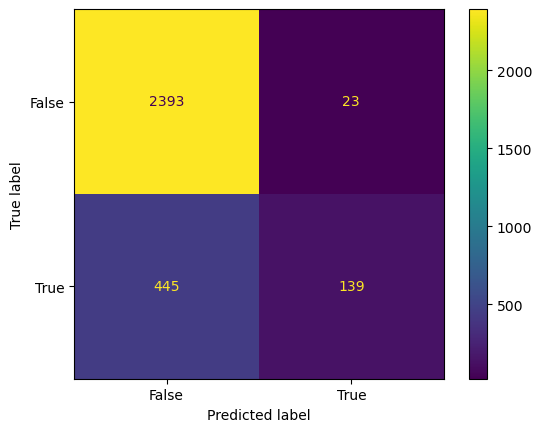

In [59]:
### Matriz de confusión
matrizConfusion = metrics.confusion_matrix(targetValidacion, prediccion)
matriz = metrics.ConfusionMatrixDisplay(confusion_matrix = matrizConfusion, display_labels = [False, True])
matriz.plot()
plt.show()

### Interesa identificar 1's es decir True clientes que se van del banco

In [60]:
## Segundo modelo

rl=LogisticRegression()

In [61]:
rl.fit(datosEntrenamiento, targetEntrenamiento)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
prediccion_rl = rl.predict(datosValidacion)

In [65]:
### Resultados del modelo

print("Exactitud: ", accuracy_score(targetValidacion, prediccion_rl)*100,"%")
print("AUC: ", roc_auc_score(targetValidacion, prediccion_rl))
print("Precisión: ",precision_score(targetValidacion, prediccion_rl)*100,"%")
print("Sensibilidad: ",recall_score(targetValidacion, prediccion_rl)*100,"%")

Exactitud:  80.0 %
AUC:  0.5317461217454413
Precisión:  43.54838709677419 %
Sensibilidad:  9.246575342465754 %


In [69]:
### Información del árbol de decisión para entender el problema
columnas =['ScoreCrediticio','Edad','AñosCliente','Saldo',
           'CantidadProductos','TarjetaCredito',
           'ClienteActivo','Salario','Genero',
           'Alemania','España']


arbolGraf = export_graphviz(tree, feature_names=columnas, filled=True,out_file=None, class_names=["0","1"] )
                                
graf = graph_from_dot_data(arbolGraf)

graf.write_png('tree.png')

True

### Conclusiones del árbol de decisión

1- Clientes con edades mayores a 50 años y que no presentaron actividad en los canales digitales tienen más probabilidad de dejar el banco.

2- Clientes que tengan más de dos productos bancarios, que presentan actividad bancaria en canales digitales y con edades superiores a los 41 años tienen más probabilidades de dejar el banco.

3- Clientes con edades menores a 41 años, con más de dos productos bancarios y con saldos superiores a $ 23 mil dólares se están fugando del banco

4- La edad es una variable importante para retener clientes. Clientes jóvenes son más propensos a quedarse. 
